# Ecuaciones Diferenciales

---
### Profesor: Juan Marcos Marín
### Profesor: Daniel Ruiz
### Nombre: Isaac Villada y Carolina Pabón
*Métodos computacionales 2024-II*

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# 1
El número de átomos radiactivos que decaen en un período de tiempo dado es proporcional al número de átomos en la muestra:

$$
\frac{dN}{dt} = -\lambda N
$$

con $\lambda=\frac{\ln{2}}{t_{1/2}}$ siendo $t_{1/2}$ el tiempo de vida media.

Escriba un programa que utilice el método de Euler para graficar $N(t)$. Compare con la solución exacta, $N(t) = N_0 e^{-\lambda t}$, para comparación. Tome $N_0=1000$ y $t_{1/2}=15$ horas, lo cual es el valor para el $^{24}Na$.

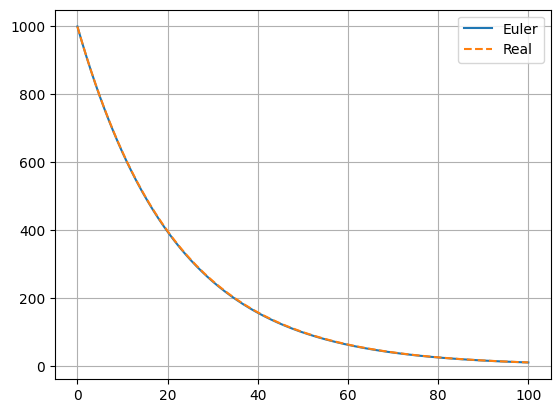

In [ ]:
N_0 = 1000
t_medio = 15
lambda_ = np.log(2) / t_medio

N_t = lambda t : N_0 * np.e**(-lambda_ * t)
N = lambda t, N_ : -lambda_ * N_

def euler_method(f, x0, y0, h, x_end):
    """
    Implementación del método de Euler
    f: función que define la EDO dy/dx = f(x,y)
    x0, y0: condición inicial
    h: tamaño del paso
    x_end: valor final de x
    """
    # Calcular el número de pasos
    n_steps = int((x_end - x0) / h)

    # Inicializar arreglos
    x = np.zeros(n_steps + 1)
    y = np.zeros(n_steps + 1)

    # Establecer condición inicial
    x[0] = x0
    y[0] = y0

    # Iterar aplicando el método de Euler
    for i in range(n_steps):
        x[i+1] = x[i] + h
        y[i+1] = y[i] + h * f(x[i], y[i])

    return x, y

x_vals, y_vals = euler_method(N, 0, N_0, 0.2, 100)
x = np.linspace(0, 100, 100)

plt.plot(x_vals, y_vals, label = 'Euler')
plt.plot(x, N_t(x), label = 'Real', linestyle='--')
plt.legend()
plt.grid(True)

# 2
El péndulo de la figura está suspendido de un collar deslizante. El sistema está en reposo cuando se le impone un movimiento oscilante $y(t)=Y \sin{\omega t}$ sobre la cuenta, comenzando en $t=0$. La ecuación diferencial que describe el movimiento del péndulo es

$$\ddot{\theta}=-\frac{g}{L} \sin{\theta} + \frac{\omega^2}{L}Y \cos{\theta}\sin{\omega t} $$

Grafique $\theta$ vs $t$ con $0\leq t \leq 10s$ y determine el $\theta$ mayor en este intervalo. Use $g=9.8 \ m/s^2$, $L=1.0 \ m$, $Y=0.25 \ m$ y $\omega=2.5 \ rad/s$. Con $\theta(0)=0$ y $\dot{\theta}(0)=0.1 \ rad/s$.


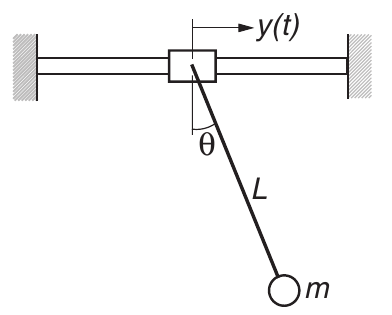

Valor máximo de theta 0.8900763427024491 rad


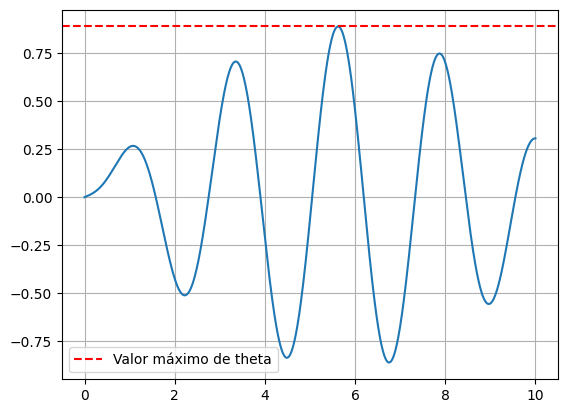

In [ ]:
g = 9.8
L = 1
Y = 0.25
omega = 2.5
theta_0 = 0
theta_prima_0 = 0.1
t_0 = 0

theta_prima_2 = lambda t, theta, w : -(g/L) * np.sin(theta) + (omega**2 / L) * Y * np.cos(theta) * np.sin(omega*t)

def euler_orden2(f, t0, x0, fpx0, h, t_end):
  n_steps = int((t_end - t0) / h)

  t = np.zeros(n_steps + 1)
  x = np.zeros(n_steps + 1)
  fp = np.zeros(n_steps + 1)

  t[0], x[0], fp[0] = t0, x0, fpx0
  for i in range(n_steps):
    t[i+1] = t[i] + h
    x[i+1] = x[i] + h * fp[i]
    fp[i+1] = fp[i] + h * f(t[i], x[i], fp[i])

  return t, x, fp

t_vals, theta_vals, theta_prima = euler_orden2(theta_prima_2, t_0, theta_0, theta_prima_0, 0.01, 10)

theta_max = max(theta_vals)

plt.plot(t_vals, theta_vals)
plt.axhline(theta_max, color = 'r', linestyle = '--', label = 'Valor máximo de theta')
plt.grid(True)
plt.legend()

print('Valor máximo de theta', theta_max, 'rad')

# 3
El circuito eléctrico de la figura cuenta con una resistencia y un capacitor:

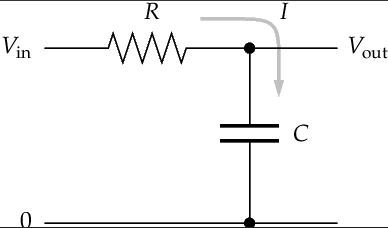


Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.


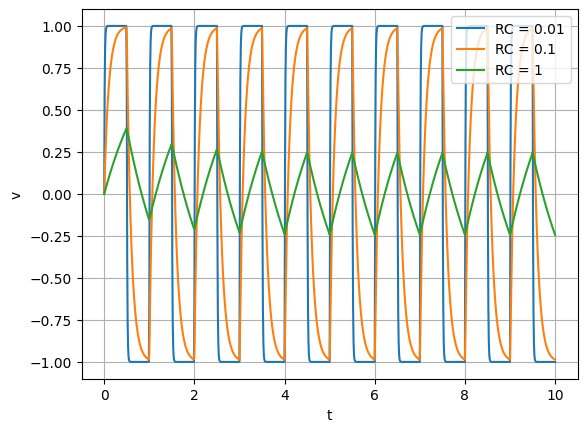

In [ ]:
v_f_0 = 0
t_i = 0
t_f = 10
RC_1, RC_2, RC_3 = 0.01, 0.1, 1

def v_in(t):
    return 1 if np.floor(2 * t) % 2 == 0 else -1

def dvdt_1(t, v_out):
    return (v_in(t) - v_out) / RC_1

def dvdt_2(t, v_out):
    return (v_in(t) - v_out) / RC_2

def dvdt_3(t, v_out):
    return (v_in(t) - v_out) / RC_3

def RK4(f, x0, y0, h, x_end):
    """
    Método de Runge-Kutta de 4º orden para sistemas de ecuaciones diferenciales.

    Args:
        f: Función que define el sistema de EDOs.
        x0: Valor inicial de x.
        y0: Vector de valores iniciales de y (np.array).
        h: Tamaño del paso.
        x_end: Valor final de x.

    Returns:
        x_points: Valores de x.
        y_points: Matriz con las aproximaciones de y en cada paso.
    """
    n = int(np.round((x_end - x0) / h))
    x_points = np.zeros(n+1)
    y_points = np.zeros((n+1, len(y0)))

    x_points[0] = x0
    y_points[0, :] = y0

    for i in range(n):
        x = x_points[i]
        y = y_points[i, :]

        k1 = h * f(x, y)
        k2 = h * f(x + h/2, y + k1/2)
        k3 = h * f(x + h/2, y + k2/2)
        k4 = h * f(x + h, y + k3)

        x_points[i+1] = x + h
        y_points[i+1, :] = y + (k1 + 2*k2 + 2*k3 + k4) / 6

    x_points[-1] = x_end  # Asegurar que el último punto es exactamente x_end
    return x_points, y_points

t_values_1, v_out_values_1 = RK4(dvdt_1, t_i, np.array([v_f_0]), 0.01, t_f)
t_values_2, v_out_values_2 = RK4(dvdt_2, t_i, np.array([v_f_0]), 0.01, t_f)
t_values_3, v_out_values_3 = RK4(dvdt_3, t_i, np.array([v_f_0]), 0.01, t_f)

plt.plot(t_values_1, v_out_values_1, label = 'RC = 0.01')
plt.plot(t_values_2, v_out_values_2, label = 'RC = 0.1')
plt.plot(t_values_3, v_out_values_3, label = 'RC = 1')
plt.xlabel('t')
plt.ylabel('v')
plt.legend()
plt.grid()


# 4


Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con h=0.001 y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

<ipython-input-6-0b5293b4afde>:12: RuntimeWarning: divide by zero encountered in scalar divide
  z = lambda z: 1 / np.sqrt((1 - z**2) * (1 - alpha * z**2))
<ipython-input-6-0b5293b4afde>:13: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  k_alpha, _ = quad(z, 0, 1)


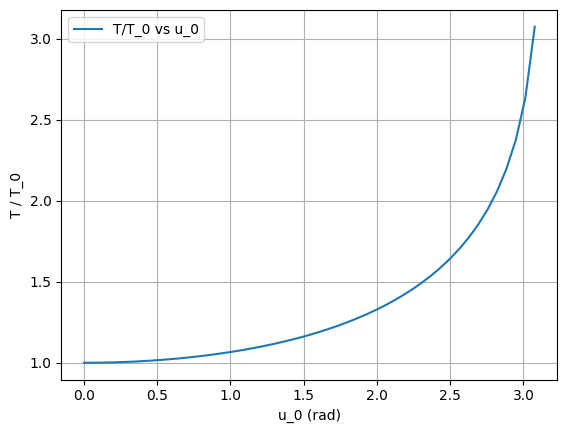

In [ ]:
u_0_values = np.linspace(0, np.pi, 50)
g = 9.8
l = 1
T_0 = 2 * np.pi * np.sqrt(l/g)

def pendulo(t, y):
    u, v = y
    return np.array([v, -(g/l) * np.sin(u)])

def periodo(u_0):
    alpha = (np.sin(u_0 / 2)) ** 2
    z = lambda z: 1 / np.sqrt((1 - z**2) * (1 - alpha * z**2))
    k_alpha, _ = quad(z, 0, 1)
    return T_0 * (2/np.pi) * k_alpha


t, sol_1 = RK4(pendulo, 0, np.array([1, 0]), 0.001, 10)
t, sol_2 = RK4(pendulo, 0, np.array([np.pi/2, 0]), 0.001, 10)


periodos = [periodo(u) for u in u_0_values]


plt.plot(u_0_values, np.array(periodos)/T_0, label="T/T_0 vs u_0")
plt.xlabel("u_0 (rad)")
plt.ylabel("T / T_0")
plt.legend()
plt.grid()

# 5

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


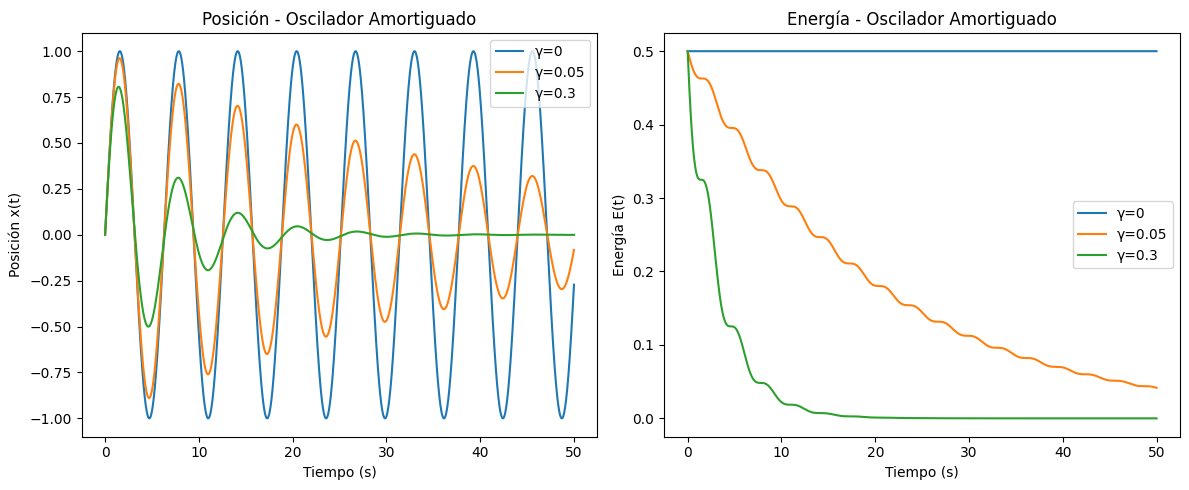

In [ ]:

m = 1
k = 1
omega_0 = np.sqrt(k/m)

def oscilador(t, Y, gamma, F_t):
    x, v = Y
    dxdt = v
    dvdt = (F_t - gamma * v - omega_0**2 * x) / m
    return np.array([dxdt, dvdt])

def rk4_step(f, t, Y, dt, gamma, F_t):
    k1 = f(t, Y, gamma, F_t)
    k2 = f(t + dt/2, Y + dt*k1/2, gamma, F_t)
    k3 = f(t + dt/2, Y + dt*k2/2, gamma, F_t)
    k4 = f(t + dt, Y + dt*k3, gamma, F_t)
    return Y + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)

def simular_oscilador_amortiguado(gamma_values, t_max=50, dt=0.01):
    t_values = np.arange(0, t_max, dt)
    resultados = {}

    for gamma in gamma_values:
        Y = np.array([0.0, 1.0])
        x_vals, E_vals = [], []

        for t in t_values:
            x, v = Y
            x_vals.append(x)
            E_vals.append(0.5 * m * v**2 + 0.5 * k * x**2)
            Y = rk4_step(oscilador, t, Y, dt, gamma, 0)

        resultados[gamma] = (t_values, np.array(x_vals), np.array(E_vals))

    return resultados

def graficar_resultados(resultados, titulo):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    for gamma, (t, x, E) in resultados.items():
        plt.plot(t, x, label=f'γ={gamma}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Posición x(t)')
    plt.legend()
    plt.title(f'Posición - {titulo}')

    plt.subplot(1, 2, 2)
    for gamma, (t, x, E) in resultados.items():
        plt.plot(t, E, label=f'γ={gamma}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Energía E(t)')
    plt.legend()
    plt.title(f'Energía - {titulo}')

    plt.tight_layout()
    plt.show()

gamma_vals = [0, 0.05, 0.3]
resultados_amortiguado = simular_oscilador_amortiguado(gamma_vals)
graficar_resultados(resultados_amortiguado, 'Oscilador Amortiguado')


# 6

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- α = 0.8 (tasa de reproducción de los conejos)
- β = 0.04 (tasa de depredación de conejos por zorros)
- γ = 0.3 (tasa de mortalidad natural de los zorros)
- δ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


a. Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

b. Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

c. Compare los resultados de Euler y RK4 mediante:
   * Gráficas de la evolución temporal de ambas poblaciones
   * Diagrama de fase (x vs y)
   * Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

d. Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

e. Investigue cómo las variaciones en los parámetros α, β, γ y δ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.



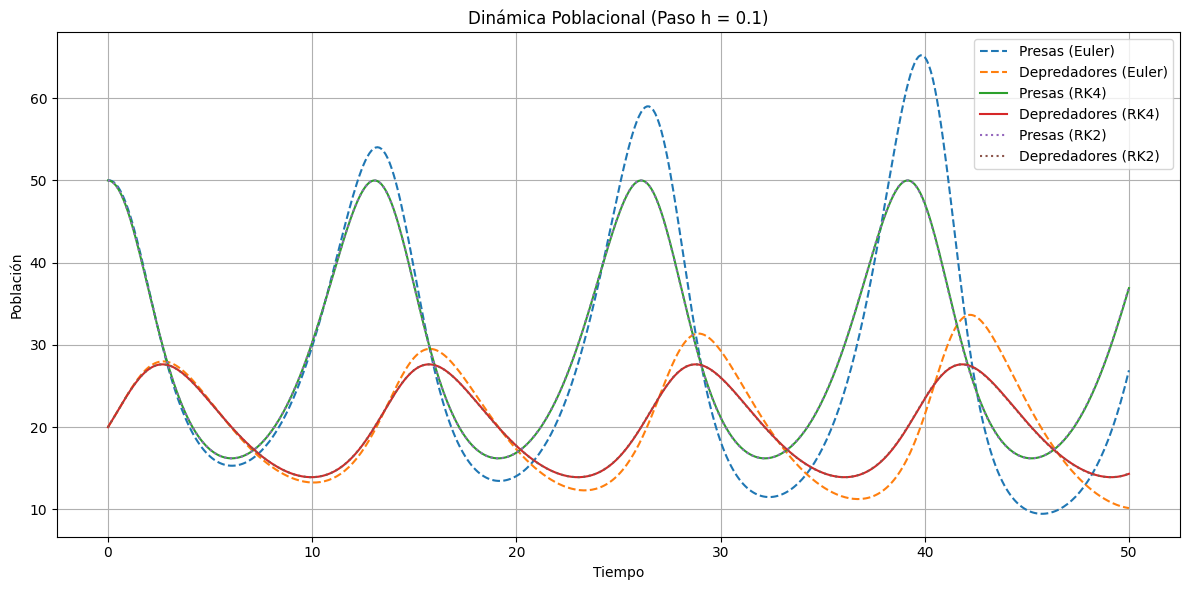

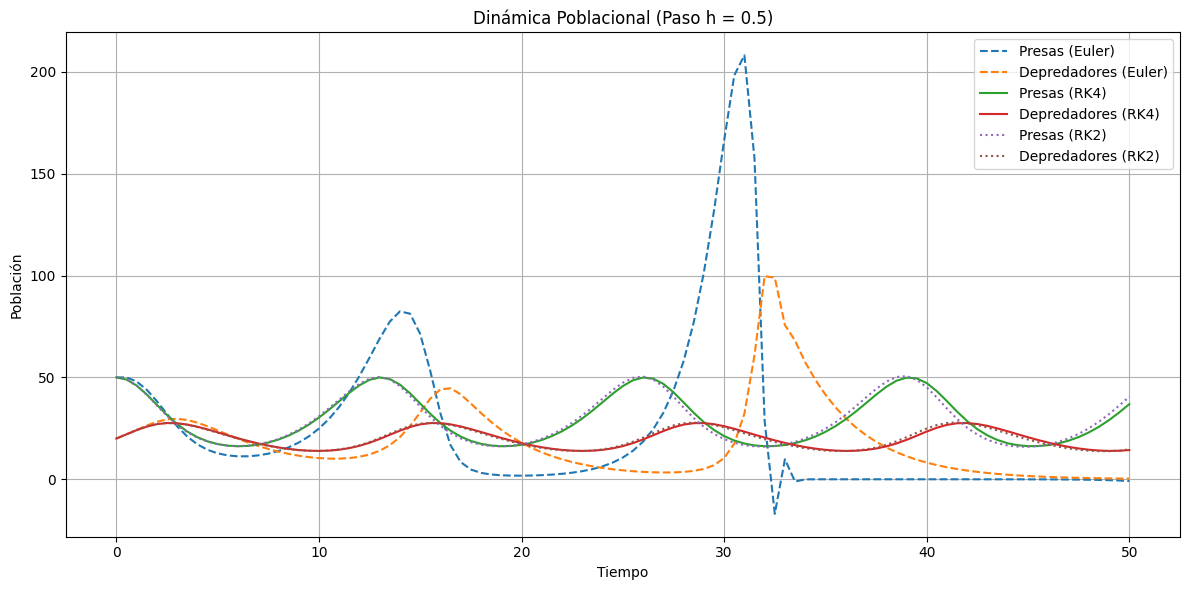

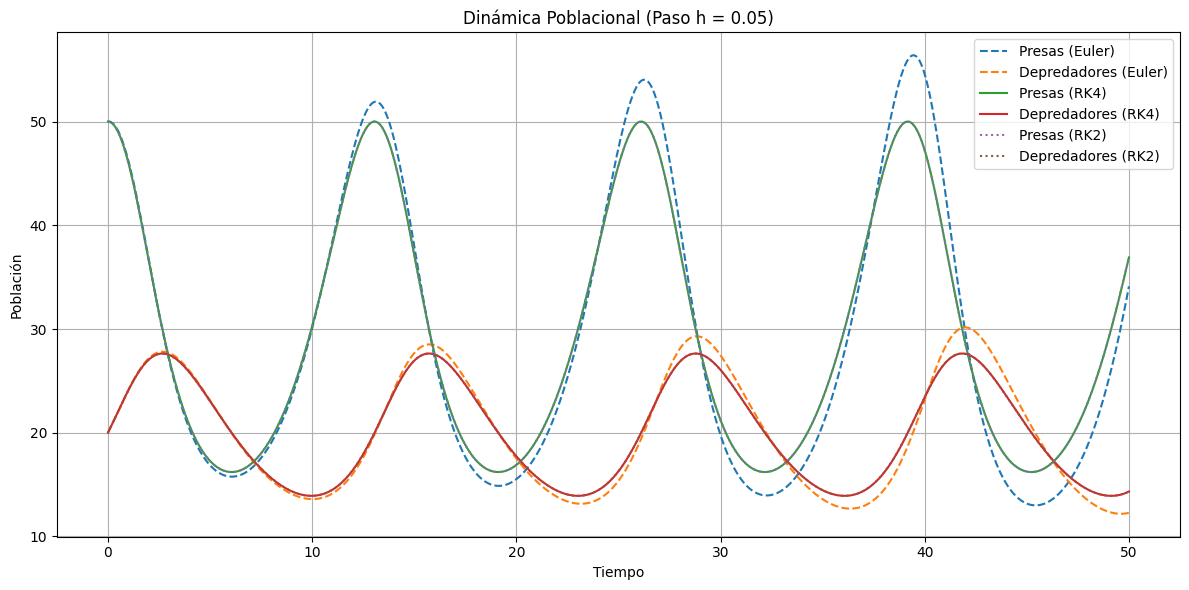

In [ ]:
def depredador_presa(t, Y, alfa=0.8, beta=0.04, gamma=0.3, delta=0.01):
    x, y = Y
    dxdt = alfa * x - beta * x * y
    dydt = -gamma * y + delta * x * y
    return np.array([dxdt, dydt])

def metodo_euler(f, y0, h, t_fin):
    n_pasos = int(t_fin / h)
    y = np.zeros((n_pasos + 1, len(y0)))
    t = np.zeros(n_pasos + 1)
    y[0] = y0
    for i in range(n_pasos):
        t[i + 1] = t[i] + h
        y[i + 1] = y[i] + h * f(t[i], y[i])
    return t, y

def RK4(f, y0, h, t_fin):
    n_pasos = int(t_fin / h)
    t = np.zeros(n_pasos + 1)
    y = np.zeros((n_pasos + 1, len(y0)))
    t[0] = 0
    y[0] = y0
    for i in range(n_pasos):
        ti = t[i]
        yi = y[i]
        k1 = h * f(ti, yi)
        k2 = h * f(ti + h/2, yi + k1/2)
        k3 = h * f(ti + h/2, yi + k2/2)
        k4 = h * f(ti + h, yi + k3)
        t[i + 1] = ti + h
        y[i + 1] = yi + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, y

def RK2_Ralston(f, y0, h, t_fin):
    n_pasos = int(t_fin / h)
    t = np.zeros(n_pasos + 1)
    y = np.zeros((n_pasos + 1, len(y0)))
    t[0] = 0
    y[0] = y0
    for i in range(n_pasos):
        ti = t[i]
        yi = y[i]
        k1 = f(ti, yi)
        k2 = f(ti + 2*h/3, yi + 2*h/3 * k1)
        t[i + 1] = ti + h
        y[i + 1] = yi + h/4 * (k1 + 3*k2)
    return t, y

poblacion_inicial = [50, 20]
h_valores = [0.1, 0.5, 0.05]
t_fin = 50
alfa, beta, gamma, delta = 0.8, 0.04, 0.3, 0.01

for h in h_valores:
    t_euler, sol_euler = metodo_euler(
        lambda t, Y: depredador_presa(t, Y, alfa, beta, gamma, delta),
        poblacion_inicial, h, t_fin
    )
    t_rk4, sol_rk4 = RK4(
        lambda t, Y: depredador_presa(t, Y, alfa, beta, gamma, delta),
        poblacion_inicial, h, t_fin
    )
    t_rk2, sol_rk2 = RK2_Ralston(
        lambda t, Y: depredador_presa(t, Y, alfa, beta, gamma, delta),
        poblacion_inicial, h, t_fin
    )


    plt.figure(figsize=(12, 6))
    plt.plot(t_euler, sol_euler[:, 0], label='Presas (Euler)', linestyle='dashed')
    plt.plot(t_euler, sol_euler[:, 1], label='Depredadores (Euler)', linestyle='dashed')
    plt.plot(t_rk4, sol_rk4[:, 0], label='Presas (RK4)')
    plt.plot(t_rk4, sol_rk4[:, 1], label='Depredadores (RK4)')
    plt.plot(t_rk2, sol_rk2[:, 0], label='Presas (RK2)', linestyle='dotted')
    plt.plot(t_rk2, sol_rk2[:, 1], label='Depredadores (RK2)', linestyle='dotted')
    plt.xlabel('Tiempo')
    plt.ylabel('Población')
    plt.legend()
    plt.title(f'Dinámica Poblacional (Paso h = {h})')
    plt.grid()
    plt.tight_layout()


# 7

En un laboratorio de dinámica, se estudia el comportamiento de dos péndulos acoplados mediante un resorte de constante elástica $k$. Cada péndulo de longitud $L$ y masa $m$ está suspendido de un soporte fijo y oscila en el plano. Se asume que los desplazamientos son pequeños, permitiendo aproximar el movimiento mediante ecuaciones diferenciales lineales.  

Las ecuaciones de movimiento para los ángulos $\theta_1(t)$ y $\theta_2(t)$ de los péndulos con respecto a la vertical están dadas por el sistema:  

$$
\begin{aligned}
mL^2 \ddot{\theta}_1 + mgL\theta_1 + kL^2(\theta_1 - \theta_2) &= 0, \\
mL^2 \ddot{\theta}_2 + mgL\theta_2 + kL^2(\theta_2 - \theta_1) &= 0.
\end{aligned}
$$

Definiendo el vector de estado $\mathbf{y} = [\theta_1, \dot{\theta}_1, \theta_2, \dot{\theta}_2]^T$, escribir el sistema en forma matricial como una ecuación de primer orden:

$$
\frac{d\mathbf{y}}{dt} = \mathbf{A} \mathbf{y},
$$

donde $\mathbf{A}$ es la matriz de coeficientes del sistema.  

- Expresar el sistema en forma de ecuaciones diferenciales de primer orden.  
- Construir la matriz $\mathbf{A}$ del sistema.  
- Resolver el sistema utilizando el **método de Runge-Kutta de cuarto orden (RK4)**.  
- Comparar los resultados obtenidos con los distintos métodos numéricos.  
- Analizar la estabilidad de la solución y discutir los efectos de la constante $k$ en la dinámica del sistema.  
- Graficar la evolución temporal de los ángulos $\theta_1(t)$ y $\theta_2(t)$.
- Representar la trayectoria en el espacio de fases $(\theta_1, \dot{\theta}_1)$ y $(\theta_2, \dot{\theta}_2)$.  

Para la simulación, se pueden utilizar los valores:  
- $m = 1$ kg,  
- $L = 1$ m,  
- $g = 9.81$ m/s²,  
- $k = 0.5$ N/m,  
- Condiciones iniciales: $\theta_1(0) = 0.1$, $\dot{\theta}_1(0) = 0$, $\theta_2(0) = 0$, $\dot{\theta}_2(0) = 0$.  
- Intervalo de simulación: $t \in [0,10]$ s con paso $\Delta t = 0.01$ s.  


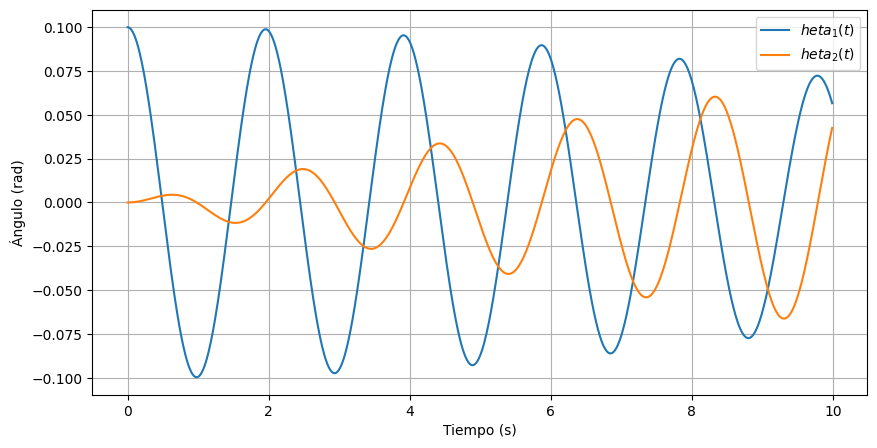

In [ ]:

def sistema_pendulos(t, y, g, L, k, m):
    theta1, v1, theta2, v2 = y

    a11, a12, a21, a22 = 0, 1, 0, 0
    a31, a32, a33, a34 = -g/L - k/m, 0, k/m, 0
    a41, a42, a43, a44 = 0, 0, 0, 1
    a51, a52, a53, a54 = k/m, 0, -g/L - k/m, 0

    dydt = np.array([
        v1,
        a31 * theta1 + a33 * theta2,
        v2,
        a51 * theta1 + a53 * theta2
    ])
    return dydt

def rk4(f, y0, t, params):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0

    for i in range(n - 1):
        dt = t[i+1] - t[i]
        k1 = f(t[i], y[i], *params)
        k2 = f(t[i] + dt/2, y[i] + dt*k1/2, *params)
        k3 = f(t[i] + dt/2, y[i] + dt*k2/2, *params)
        k4 = f(t[i] + dt, y[i] + dt*k3, *params)
        y[i+1] = y[i] + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)

    return y

# Parámetros
m, L, g, k = 1, 1, 9.81, 0.5
t = np.arange(0, 10, 0.01)
y0 = [0.1, 0, 0, 0]

# Resolver sistema
y = rk4(sistema_pendulos, y0, t, (g, L, k, m))

# Graficar resultados
plt.figure(figsize=(10, 5))
plt.plot(t, y[:, 0], label="$\theta_1(t)$")
plt.plot(t, y[:, 2], label="$\theta_2(t)$")
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (rad)")
plt.legend()
plt.grid()
plt.show()


# 8

El problema restringido de tres cuerpos estudia el movimiento de una partícula de masa despreciable (como un satélite o un asteroide) bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$ (como el Sol y la Tierra) que orbitan su centro de masa en trayectorias circulares. Se asume que los dos cuerpos principales siguen la tercera ley de Kepler y que la partícula testigo no influye en su movimiento.  

Si utilizamos un **sistema de coordenadas rotante** centrado en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, las ecuaciones de movimiento del cuerpo de prueba vienen dadas por:  

$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y}
$$

donde $\omega$ es la velocidad angular del sistema y $U$ es el **potencial efectivo**, dado por:  

$$
U = -\frac{G m_1}{r_1} - \frac{G m_2}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2),
$$

con $r_1$ y $r_2$ las distancias del cuerpo de prueba a $m_1$ y $m_2$.  

Se sabe que en este sistema existen cinco **puntos de Lagrange** $L_1, L_2, L_3, L_4, L_5$ donde las fuerzas gravitacionales y la aceleración centrífuga se equilibran, permitiendo que un objeto permanezca en equilibrio relativo con respecto a los cuerpos masivos.  

- Determinar las coordenadas de los puntos de Lagrange en el sistema rotante, en particular $L_4$ y $L_5$.  
- Explicar la condición para que estos puntos sean estables en términos de la razón de masas $\mu = m_2 / (m_1 + m_2)$.  

- Introducir pequeñas perturbaciones alrededor de $L_4$ y $L_5$:  
  $$
  x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
  $$
- Expandir las ecuaciones de movimiento en serie de Taylor hasta primer orden en $\xi$ y $\eta$.  
- Escribir el sistema de ecuaciones en forma matricial:  
  $$
  \frac{d}{dt}  
  \begin{bmatrix}  
  \xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
  \end{bmatrix}  
  = \mathbf{A}  
  \begin{bmatrix}  
  \xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
  \end{bmatrix},
  $$  
  donde $\mathbf{A}$ es la matriz jacobiana evaluada en $L_4$.  
- Calcular los valores propios de $\mathbf{A}$ y analizar su signo y parte imaginaria.  
- Explicar por qué la estabilidad depende de la razón de masas $\mu$.  
- Identificar el valor crítico de $\mu$ que separa las regiones de estabilidad e inestabilidad (conocido como el criterio de Routh, aproximadamente $\mu \approx 0.03852$).  



In [ ]:
G = 1
m1 = 1
m2 = 0.1
mu = m2 / (m1 + m2)


x_L4 = 0.5 - mu
y_L4 = np.sqrt(3) / 2
x_L5 = 0.5 - mu
y_L5 = -np.sqrt(3) / 2

print("Coordenadas de L4: ({:.3f}, {:.3f})".format(x_L4, y_L4))
print("Coordenadas de L5: ({:.3f}, {:.3f})".format(x_L5, y_L5))


mu_critico = 0.5 * (1 - np.sqrt(69) / 9)
if mu < mu_critico:
    print("Los puntos L4 y L5 son estables para μ = {:.5f}".format(mu))
else:
    print("Los puntos L4 y L5 son inestables para μ = {:.5f}".format(mu))


omega = np.sqrt(G * (m1 + m2))


A = np.array([[0, 1, 0, 0],
              [3 * omega**2, 0, 0, 2 * omega],
              [0, 0, 0, 1],
              [0, -2 * omega, -omega**2, 0]])

print("\nMatriz jacobiana A:")
print(A)


valores_propios = np.linalg.eigvals(A)
print("\nValores propios de A:")
print(valores_propios)

for vp in valores_propios:
    if np.real(vp) > 0:
        print("Inestabilidad detectada: Parte real positiva en valor propio", vp)
        break

Coordenadas de L4: (0.409, 0.866)
Coordenadas de L5: (0.409, -0.866)
Los puntos L4 y L5 son inestables para μ = 0.09091

Matriz jacobiana A:
[[ 0.         1.         0.         0.       ]
 [ 3.3        0.         0.         2.0976177]
 [ 0.         0.         0.         1.       ]
 [ 0.        -2.0976177 -1.1        0.       ]]

Valores propios de A:
[-9.15933995e-16+1.81659021j -9.15933995e-16-1.81659021j
 -1.04880885e+00+0.j          1.04880885e+00+0.j        ]
Inestabilidad detectada: Parte real positiva en valor propio (1.0488088481701516+0j)


# 9

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  

En este problema, estudiaremos la estabilidad de estas oscilaciones en función de la velocidad de dispersión del disco y el criterio de Toomre para la formación de estructuras espirales.  


- Escribir el sistema de ecuaciones hidrodinámicas que gobiernan el movimiento de una perturbación en el disco.  
- Determinar la relación entre la frecuencia de epicíclo $\kappa$ y la curva de rotación de la galaxia.  
- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  


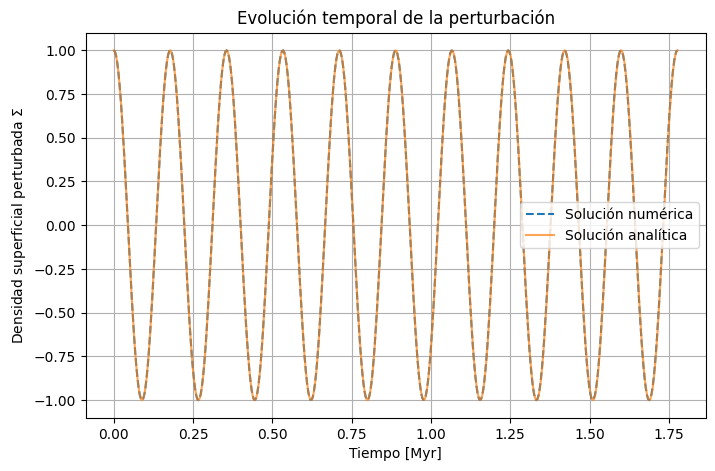

Valores propios del sistema: [0.+35.35533906j 0.-35.35533906j]


In [ ]:

from scipy.integrate import solve_ivp

def sistema_jeans(t, Y, kappa):
    dSigma, Sigma = Y[1], Y[0]
    d2Sigma = -kappa**2 * Sigma
    return [dSigma, d2Sigma]

V0 = 200
r = 8
Omega = V0 / r
kappa = np.sqrt(2) * Omega

Sigma0 = 1.0
dSigma0 = 0.0
Y0 = [Sigma0, dSigma0]

t_max = 2 * np.pi / kappa * 10
t_eval = np.linspace(0, t_max, 500)

sol = solve_ivp(sistema_jeans, [0, t_max], Y0, t_eval=t_eval, args=(kappa,))

Sigma_analitica = Sigma0 * np.cos(kappa * t_eval)

plt.figure(figsize=(8, 5))
plt.plot(sol.t, sol.y[0], label='Solución numérica', linestyle='--')
plt.plot(t_eval, Sigma_analitica, label='Solución analítica', alpha=0.7)
plt.xlabel('Tiempo [Myr]')
plt.ylabel('Densidad superficial perturbada $\Sigma$')
plt.legend()
plt.grid()
plt.title('Evolución temporal de la perturbación')
plt.show()

A = np.array([[0, 1], [-kappa**2, 0]])
eigenvalues = np.linalg.eigvals(A)
print(f'Valores propios del sistema: {eigenvalues}')
